In [1]:
from google.colab import drive
drive.mount ("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Gerekli kütüphaneleri import ettim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from PIL import Image
from keras.preprocessing import image

In [3]:
#Test ve Eğitim kümelerini oluşturdum:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)#Boyut değişikliği yaptım
x_test=x_test.reshape(10000,28,28,1)#Boyut değişikliği yaptım
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [4]:
fashion_list=["Tişört/üst","Pantolon","Kazak","Elbise","Çeket","Sandalet","Gömlek","Spor Ayakkabı","Sırt Çantası","Bilek Boyut Bot"]

In [6]:
#Model Oluşturma:
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.add(Dense(10))
model.compile(optimizer='adam',loss="mse",metrics=['accuracy'])

early_stopping=EarlyStopping(monitor="val_loss",patience=7)

history = model.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test),callbacks=[early_stopping])

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2047 - accuracy: 0.3210 - val_loss: 0.0696 - val_accuracy: 0.4022
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0575 - accuracy: 0.5221 - val_loss: 0.0485 - val_accuracy: 0.6075
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.5798 - val_loss: 0.0455 - val_accuracy: 0.5798
Epoch 4/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0448 - accuracy: 0.5768 - val_loss: 0.0445 - val_accuracy: 0.5831
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0440 - accuracy: 0.5831 - val_loss: 0.0438 - val_accuracy: 0.5766
Epoch 6/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0436 - accuracy: 0.5842 - val_loss: 0.0437 - val_accuracy: 0.5783
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0433 - accuracy: 0.5845 - val_loss: 0.0436 - val_accuracy:

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [16]:
#Loss ve Accuracy değerlerinin incelenmesi
score=model.evaluate(x_test,y_test)
print("Loss",score[0])
print("Accuracy",score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.5827
Loss 0.04281037300825119
Accuracy 0.5827000141143799


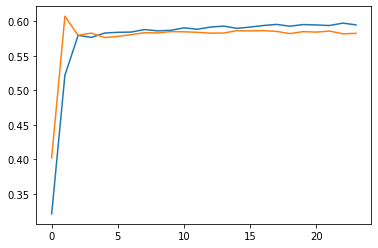

In [7]:
#Accuracy değerlerinin incelenmesi
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"]);

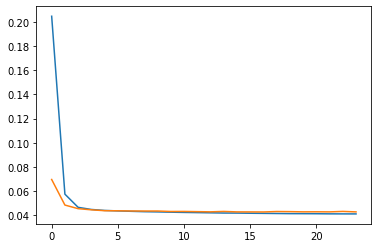

In [8]:
#Accuracy değerlerinin incelenmesi
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"]);

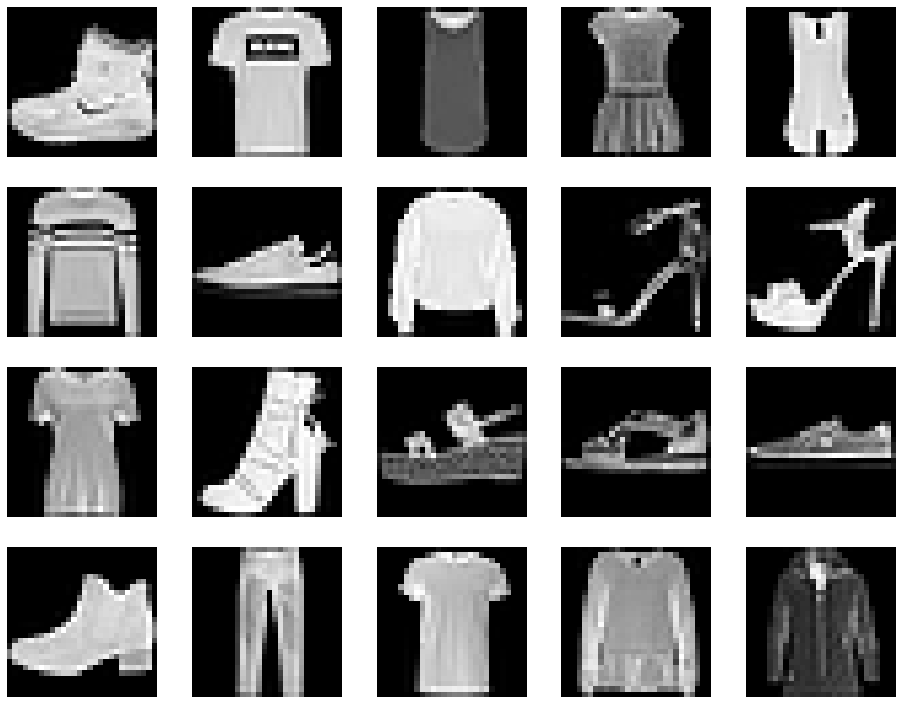

In [9]:
#Eğitim verisinden örnek görüntülerin görüntülenmesi
plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  plt.axis("off");
 

(-0.5, 27.5, 27.5, -0.5)

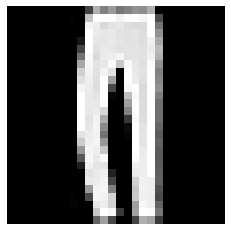

In [10]:
#test resminin hazırlanması
test=x_test[2]
plt.imshow(test.reshape(28,28),cmap="gray")
plt.axis("off")

In [11]:
#Tahmin işlemleri
pred=model.predict(test.reshape(1,28,28,1))
df=pd.DataFrame(pred,columns=["Tişört/üst","Pantolon","Kazak","Elbise","Çeket","Sandalet","Gömlek","Spor Ayakkabı","Sırt Çantası","Bilek Boyut Bot"])
df


,Tişört/üst,Pantolon,Kazak,Elbise,Çeket,Sandalet,Gömlek,Spor Ayakkabı,Sırt Çantası,Bilek Boyut Bot
0,0.002707,1.009291,-0.009227,0.005695,0.002813,0.000342,-0.007817,0.008301,-0.0009,0.004669


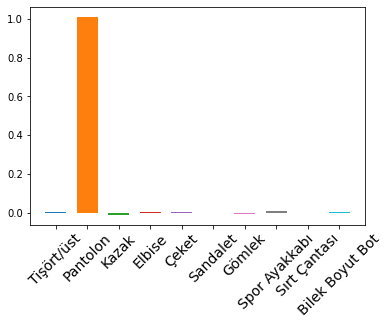

In [12]:
#Sonuçları görselleştirdim.
ind = 0.1+0.6*np.arange(len(fashion_list))
width = 0.4 
for i in range(len(fashion_list)):
    plt.bar(ind[i], pred[0][i], width)
plt.xticks(ind, fashion_list, rotation=45, fontsize=14);